In [1]:
# Import the modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
% matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x)

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
UsageError: Line magic function `%` not found.


In [2]:
#Load data into a pandas dataframe here
df = pd.read_csv("cleaned_data_ Folder/cleaned_Pond2.csv",delimiter=',',low_memory=False)
df.drop(['Unnamed: 0'], axis=1, inplace=True) 

In [3]:
df.isnull().sum()

Temperature         0
Turbidity           0
Dissolved Oxygen    0
PH                  0
Ammonia             0
Nitrate             0
Population          0
Fish_Length         0
Fish_Weight         0
Datetime            0
Date                0
Time                0
Weight_diff         0
dtype: int64

In [4]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Weight_diff
0,24.8750,100,4.505,8.43365,0.38,193,50,6.96,3.36,2021-06-19 00:00:05,2021-06-19,00:00:05,0.7
1,24.9375,100,6.601,8.43818,0.38,194,50,6.96,3.36,2021-06-19 00:01:02,2021-06-19,00:01:02,0.0
2,24.8750,100,15.797,8.42457,0.38,192,50,6.96,3.36,2021-06-19 00:01:22,2021-06-19,00:01:22,0.0
3,24.9375,100,5.046,8.43365,0.38,193,50,6.96,3.36,2021-06-19 00:01:44,2021-06-19,00:01:44,0.0
4,24.9375,100,38.407,8.40641,0.38,192,50,6.96,3.36,2021-06-19 00:02:07,2021-06-19,00:02:07,0.0


In [8]:
#Group the dataframe by date, and calculate the mean of each column
df_daily = df.groupby("Date").mean()

<ipython-input-8-8b0b896761bf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df.groupby("Date").mean()


In [9]:
#Reset the index of the dataframe to get the daily averages
df_daily.reset_index(inplace=True)

In [10]:
df_daily.head(5)

,Date,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Weight_diff
0,2021-06-19,25.428088,100.0,12.458182,8.404279,1.151256e+07,201.838762,50.0,6.96,3.36,0.000226
1,2021-06-20,25.948557,100.0,12.937845,8.393613,3.800000e-01,184.574415,50.0,7.31,4.06,0.000218
2,2021-06-21,25.349366,100.0,9.287424,8.405416,3.800000e-01,172.322064,50.0,7.66,4.76,0.000623
3,2021-06-22,25.055735,100.0,9.776551,8.333842,8.082028e+05,151.653780,50.0,8.01,5.46,0.000601
4,2021-06-23,24.505092,100.0,7.238285,8.325194,1.107521e+06,146.988419,50.0,8.36,6.16,0.000280


In [11]:
df_daily['Date'] = pd.to_datetime(df_daily['Date'],infer_datetime_format=True)
df_daily.set_index("Date",inplace=True)
df_daily=df_daily.resample('D').ffill()
df_daily.head(10)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Weight_diff
Date,,,,,,,,,,
2021-06-19,25.428088,100.0,12.458182,8.404279,1.151256e+07,201.838762,50.0,6.96,3.36,0.000226
2021-06-20,25.948557,100.0,12.937845,8.393613,3.800000e-01,184.574415,50.0,7.31,4.06,0.000218
2021-06-21,25.349366,100.0,9.287424,8.405416,3.800000e-01,172.322064,50.0,7.66,4.76,0.000623
2021-06-22,25.055735,100.0,9.776551,8.333842,8.082028e+05,151.653780,50.0,8.01,5.46,0.000601
2021-06-23,24.505092,100.0,7.238285,8.325194,1.107521e+06,146.988419,50.0,8.36,6.16,0.000280
2021-06-24,24.432276,100.0,13.445173,8.226859,9.929543e+07,146.845308,50.0,8.71,6.86,0.000513
2021-06-25,24.432276,100.0,13.445173,8.226859,9.929543e+07,146.845308,50.0,8.71,6.86,0.000513
2021-06-26,24.432276,100.0,13.445173,8.226859,9.929543e+07,146.845308,50.0,8.71,6.86,0.000513
2021-06-27,24.432276,100.0,13.445173,8.226859,9.929543e+07,146.845308,50.0,8.71,6.86,0.000513


In [ ]:
random_state=1234

Create training and testing datasets

In [12]:
X_test, y_test = df_daily[['Temperature', 'Turbidity','Dissolved Oxygen','PH','Ammonia','Nitrate']], df_daily['Weight_diff']

In [13]:
print(len(X_test), len(y_test))

134 134


# Reloading the model

In [14]:
import pickle as pkl
with open('saved_model.pkl', 'rb') as f:
    model = pkl.load(f)

In [17]:
model

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.5, random_state=1234))])

In [18]:
model.predict(X_test)

array([ 0.00798565,  0.00798565,  0.00798565,  0.01452941,  0.00974818,
        0.013452  ,  0.013452  ,  0.013452  ,  0.013452  ,  0.01330615,
        0.013452  ,  0.00852492,  0.00676239,  0.00676239,  0.00852492,
        0.00852492,  0.17437199,  0.00974818,  0.00676239,  0.00676239,
        0.01330615,  0.00852492,  0.01452941,  0.00974818,  0.00852492,
        0.00798565,  0.01452941,  0.00974818,  0.00974818,  0.00852492,
        0.00852492,  0.00974818,  0.0289322 ,  0.00974818,  0.00974818,
        0.00974818,  0.00974818,  0.00974818,  0.00974818,  0.00974818,
        0.00134396, -0.00126578,  0.01592604,  0.01616968,  0.01510179,
        0.01510179,  0.03931579,  0.0359966 ,  0.07594782,  0.01902174,
        0.02049904,  0.01902174,  0.02049904,  0.02049904, -0.007136  ,
        0.02049904,  0.01552078,  0.01902174,  0.02049904,  0.02049904,
        0.02049904,  0.02049904,  0.03506562,  0.03505819,  0.02890562,
        0.02890562,  0.02890562,  0.02890562,  0.02890562,  0.05

R²:0.7926932635647116 MSE:0.0025419724978337738


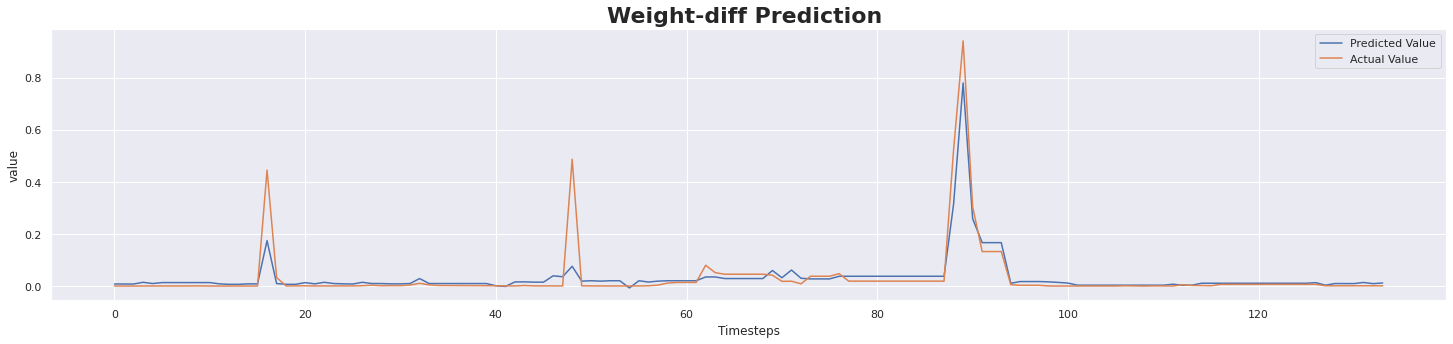

In [19]:
y_true_test = np.array(y_test, dtype = object).astype(np.float32)

y_pred_test=model.predict(X_test)
test_set = pd.DataFrame(y_pred_test)
test_set.to_csv('Weight-diff_predictions_from_gradient_boosting.csv', index = None)
print('R\u00B2:{} MSE:{}'.format(r2_score(y_true_test, y_pred_test), mean_squared_error(y_true_test, y_pred_test)))
fig_verify = plt.figure(figsize=(25, 5))
plt.plot(y_pred_test,label = 'Predicted Value')
plt.plot(y_true_test, label = 'Actual Value')
plt.title('Weight-diff Prediction ', fontsize=22, fontweight='bold')
plt.ylabel('value')
plt.xlabel('Timesteps')
plt.legend()
plt.show()
fig_verify.savefig("model_regression_verify.png")